In [4]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
print("Success")

Success


In [5]:
for dirname, _, filenames in os.walk('/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
print("Success")

Success


In [26]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    print("========================", nRow, nCol, nGraphRow)
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
print("Success")

Success


In [7]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
print("Success")

Success


In [8]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()
    
print("Success")

Success


In [9]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()
print("Success")

Success


In [10]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# telecom_churn.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('input/telecom_churn.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'telecom_churn'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 17 columns


In [11]:
df1.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25.0,110.0,45.07,99.0,16.78,91.0,11.01,3.0,2.70,1.0,False
1,OH,107,415,371-7191,no,yes,26.0,123.0,27.47,103.0,16.62,103.0,11.45,3.0,3.70,1.0,False
2,NJ,137,415,358-1921,no,no,0.0,114.0,41.38,110.0,10.30,104.0,7.32,5.0,3.29,0.0,False
3,OH,84,408,375-9999,yes,no,0.0,71.0,50.90,88.0,5.26,89.0,8.86,7.0,1.78,2.0,False
4,OK,75,415,330-6626,yes,no,0.0,113.0,28.34,122.0,12.61,121.0,8.41,3.0,2.73,3.0,False


In [12]:
df1.describe()

,account length,area code,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls
count,1000.000000,1000.000000,999.000000,998.000000,997.000000,998.000000,996.000000,997.000000,999.000000,998.000000,997.000000,999.000000
mean,99.273000,437.894000,8.412412,100.517034,31.044233,99.789579,17.009679,99.945838,9.042442,4.550100,2.769529,1.551552
std,39.482291,42.858413,13.784197,19.700190,9.284933,19.999143,4.552564,19.997517,2.305344,2.568421,0.762448,1.317029
min,1.000000,408.000000,0.000000,36.000000,5.250000,12.000000,2.650000,42.000000,2.030000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,88.000000,25.260000,87.000000,13.925000,86.000000,7.525000,3.000000,2.300000,1.000000
50%,97.000000,415.000000,0.000000,101.000000,31.210000,101.000000,17.020000,101.000000,9.060000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,22.000000,113.000000,36.910000,114.000000,20.060000,114.000000,10.660000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,163.000000,59.640000,168.000000,29.890000,175.000000,16.390000,19.000000,5.400000,9.000000


======================== 1000 7 2


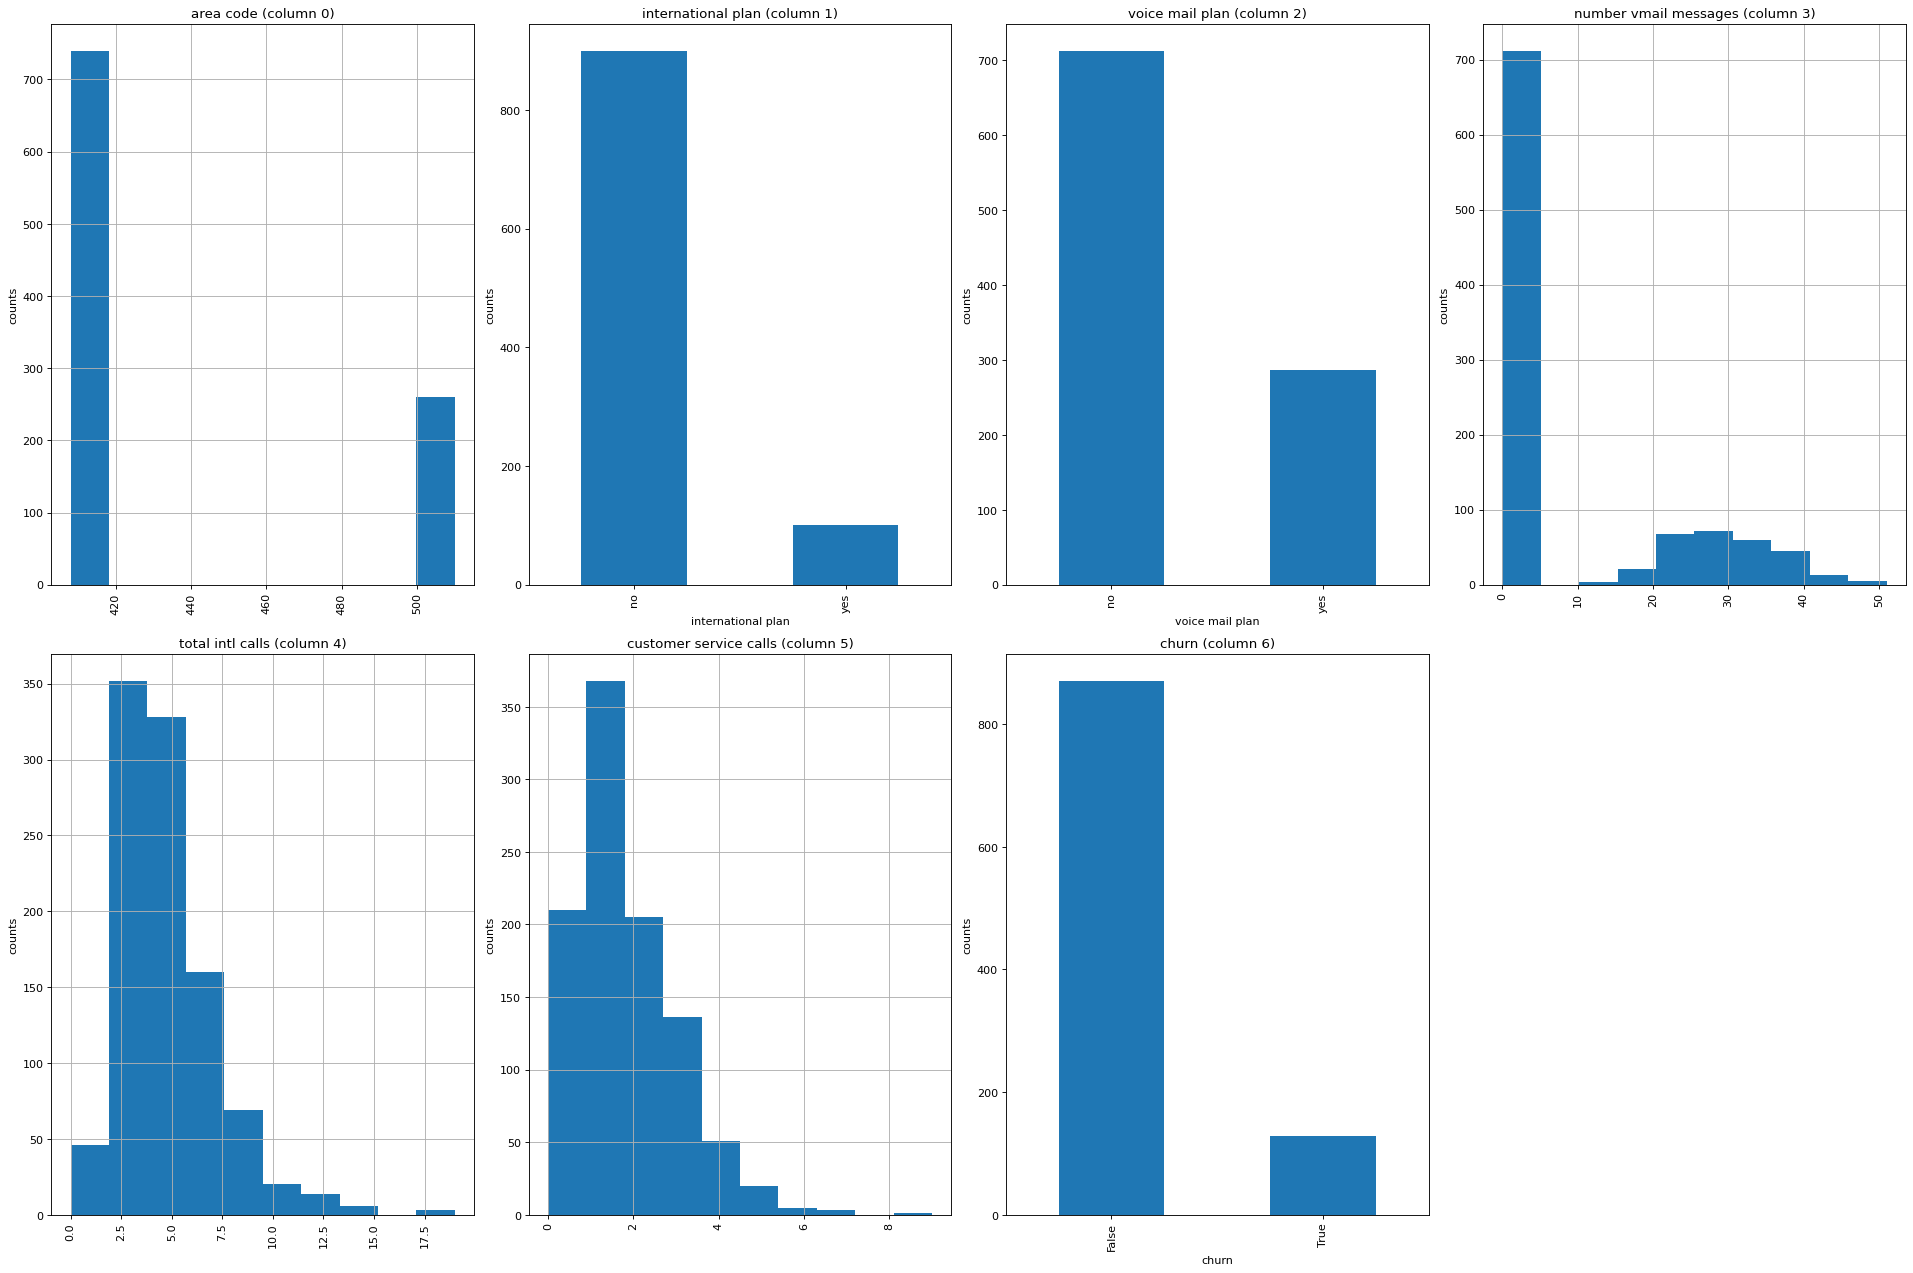

In [28]:
plotPerColumnDistribution(df1, 10, 4)